## Observations and Insights 

In [108]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')
# Display the data table for preview
combined_df.set_index('Mouse ID')

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [109]:
# Checking the number of mice.
combined_df["Mouse ID"].nunique()

249

In [110]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Uesed groupby to count the number of tests at a timepoint and then sorted
# by value to find which mouse was not 1.
test = combined_df.groupby(["Mouse ID", "Timepoint"])["Timepoint"].count()
test.sort_values(ascending=False)


Mouse ID  Timepoint
g989      15           2
          0            2
          10           2
          5            2
          20           2
                      ..
q610      30           1
          35           1
q633      0            1
          5            1
a203      0            1
Name: Timepoint, Length: 1888, dtype: int64

In [111]:
# Optional: Get all the data for the duplicate mouse ID. 
# Collects and save duplicate mouse data to dub_df dataframe
dub_df = combined_df.set_index('Mouse ID')
dub_df = dub_df.loc['g989']
dub_df.head(1)


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.0,0


In [112]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.set_index('Mouse ID')
clean_df = clean_df.drop('g989')
clean_df = clean_df.reset_index()
clean_df.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

In [113]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [114]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
new_mean = clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].mean()
new_median = clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].median()
new_var = clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].var()
new_std = clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].std()
new_sem = clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
summary_stats = pd.DataFrame({"Mean Tumor Volume": new_mean,
                                "Median Tumor Volume": new_median,
                                "Tumor Volume Variance": new_var,
                                "Tumor Volume Standard Devation": new_std,
                                "Tumor Volume SEM": new_sem})

summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Devation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [115]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(Mean='mean',
                                                             Median='median',
                                                             Variance='var',
                                                             Standard='std',
                                                             Sem='sem')


,Mean,Median,Variance,Standard,Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

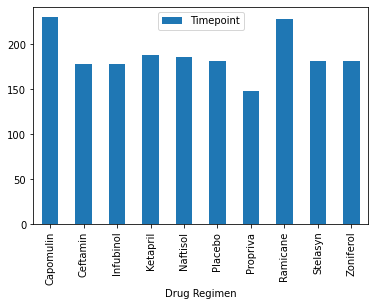

In [116]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
tot_tested = pd.DataFrame(clean_df.groupby('Drug Regimen').count()).reset_index()
x_axis = tot_tested['Drug Regimen']
y_axis = tot_tested['Timepoint']
tot_tested.plot.bar('Drug Regimen','Timepoint')


<BarContainer object of 10 artists>

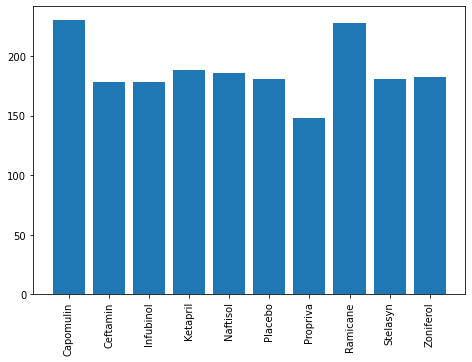

In [117]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation='vertical')
ax.bar(x_axis, y_axis)



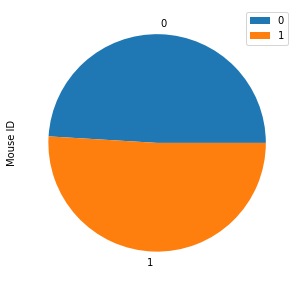

In [118]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df = pd.DataFrame(clean_df.groupby('Sex').count()).reset_index()
gender_df.plot.pie(y='Mouse ID', figsize=(5,5))


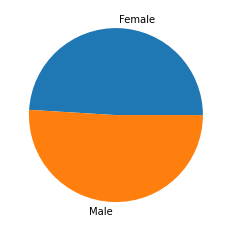

In [119]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
y = gender_df['Mouse ID']
labels = 'Female', 'Male'
fig1, ax1 = plt.subplots()
ax1.pie(y, labels=labels)
plt.show()



## Quartiles, Outliers and Boxplots

In [120]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_df = pd.DataFrame(clean_df.groupby('Drug Regimen')['Timepoint'].max())
final_df = final_df.loc[['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']]
final_df
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_final_df = final_df.merge(clean_df, how='inner')
merged_final_df

,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,45,k403,Ramicane,Male,21,16,22.050126,1
1,45,s185,Capomulin,Female,3,17,23.343598,1
2,45,x401,Capomulin,Female,16,15,28.484033,0
3,45,m601,Capomulin,Male,22,17,28.430964,1
4,45,g791,Ramicane,Male,11,16,29.128472,1
...,...,...,...,...,...,...,...,...
515,45,y769,Ceftamin,Female,6,27,68.594745,4
516,45,y865,Ceftamin,Male,23,26,64.729837,3
517,45,z581,Infubinol,Female,24,25,62.754451,3
518,45,z795,Naftisol,Female,13,29,65.741070,3


AttributeError: 'numpy.ndarray' object has no attribute 'boxplot'

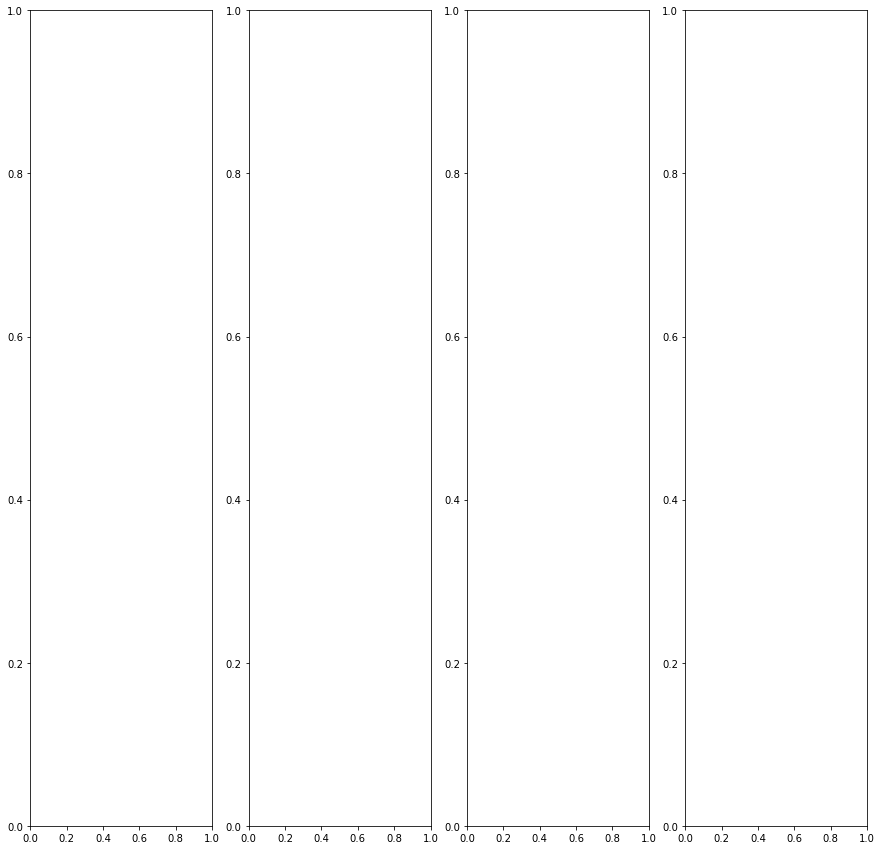

In [121]:
# Put treatments into a list for for loop (and later for plot labels)
labels = ['Ramicane', 'Capomulin', 'Ceftamin', 'Infubinol']
y_axis = merged_final_df['Tumor Volume (mm3)']
x_axis = merged_final_df['Drug Regimen']
# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
Q1 = merged_final_df['Tumor Volume (mm3)'].quantile(.25)
Q3 = merged_final_df['Tumor Volume (mm3)'].quantile(.75)
IQR = Q3 - Q1
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
#merged_final_df.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen')
# merged_final_df
fig1, ax1 = plt.subplots(ncols = 4, figsize =(15,15))
ax1.boxplot(y_axis, x_axis)
plt.show()

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

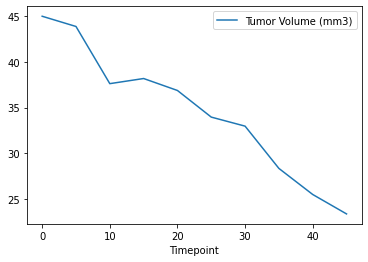

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capom_df = clean_df.set_index('Drug Regimen')
capom_df = capom_df.loc['Capomulin']
capom_df = clean_df.set_index('Mouse ID')
capom_df = capom_df.loc['s185']
capom_df.reset_index()
capom_df.plot.line('Timepoint', 'Tumor Volume (mm3)')

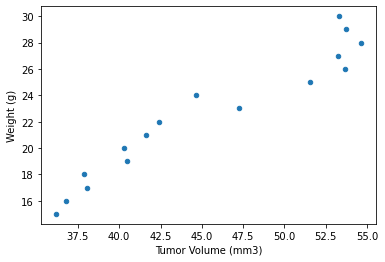

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capom_df = clean_df.set_index('Drug Regimen')
capom_df = capom_df.loc['Capomulin']
capom_dfg = pd.DataFrame(clean_df.groupby('Weight (g)')['Tumor Volume (mm3)'].mean()).reset_index()
ax1 = capom_dfg.plot.scatter('Tumor Volume (mm3)', 'Weight (g)')

## Correlation and Regression

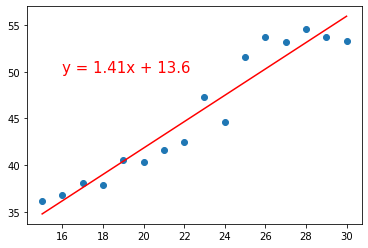

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
y_values = capom_dfg['Tumor Volume (mm3)']
x_values = capom_dfg ['Weight (g)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,50),fontsize=15,color="red")
plt.show()
